<a href="https://colab.research.google.com/github/sejallotliker/MLnow_2.0/blob/main/Univariate_linear_regression_Assignment_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Univeriate Linear regression

Course on: `ML.now().girlscript`

Author:  ```Sejal Lotliker```

Date: ```06-06-2021```




**Setup**

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os

In [58]:
path='/content/drive/MyDrive/Machine learning course by Girlscript/Univariate linear regression_day 8/bestsellers with categories.csv'
my_data=pd.read_csv(path)

In [7]:
my_data.head(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction
7,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction


In [ ]:
my_data.tail(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre
540,Wonder,R. J. Palacio,4.8,21625,9,2013,Fiction
541,Wonder,R. J. Palacio,4.8,21625,9,2014,Fiction
542,Wonder,R. J. Palacio,4.8,21625,9,2015,Fiction
543,Wonder,R. J. Palacio,4.8,21625,9,2016,Fiction
544,Wonder,R. J. Palacio,4.8,21625,9,2017,Fiction
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction
549,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2019,Non Fiction


In [1]:
ls

sample_data/


#Data processing

In [66]:
print(f'Year:{my_data.Year.unique()}')
print(f'Price:{my_data.Price.unique()}')
print(f'Genre:{my_data.Genre.unique()}')

Year:[2016 2011 2018 2017 2019 2014 2010 2009 2015 2013 2012]
Price:[  8  22  15   6  12  11  30   3   2  32   5  17   4  13  14   9  24  21
  18   0  28  16  10 105  20   1   7  19  54  52  25  27  46  39  53  40
  36  82  23  42]
Genre:[1 2]


Replacing `Non Fiction` with `1` and `Fiction` with `2`

In [59]:
my_data['Genre']=my_data['Genre'].apply({'Non Fiction':1, 'Fiction':2}.get)

In [60]:
my_data.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,1
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,2
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,1
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,2
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,1


#Data visualisation

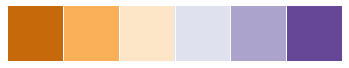

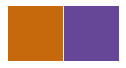

In [69]:
import seaborn as sns
sns.palplot(sns.color_palette('PuOr')) #Purpole to orange colors
pal=sns.color_palette('PuOr',6) #To print 6 shades from purple to orange
pal.as_hex() #set hex code values for colors

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors=['#c6690c','#664697'] #orange purple hex codes
sns.set_palette(sns_colors) #set the palette as sns_colors
sns.palplot(sns.color_palette(sns_colors)) #plot the color codes

In [71]:
print(f'''There are {len(my_data.columns)} columns in the data frame namely,
{my_data.columns}''')

There are 7 columns in the data frame namely,
Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')


Pairplot

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 769 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 133 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 769 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 133 missing from current font.
  font.set_text(s, 0, flags

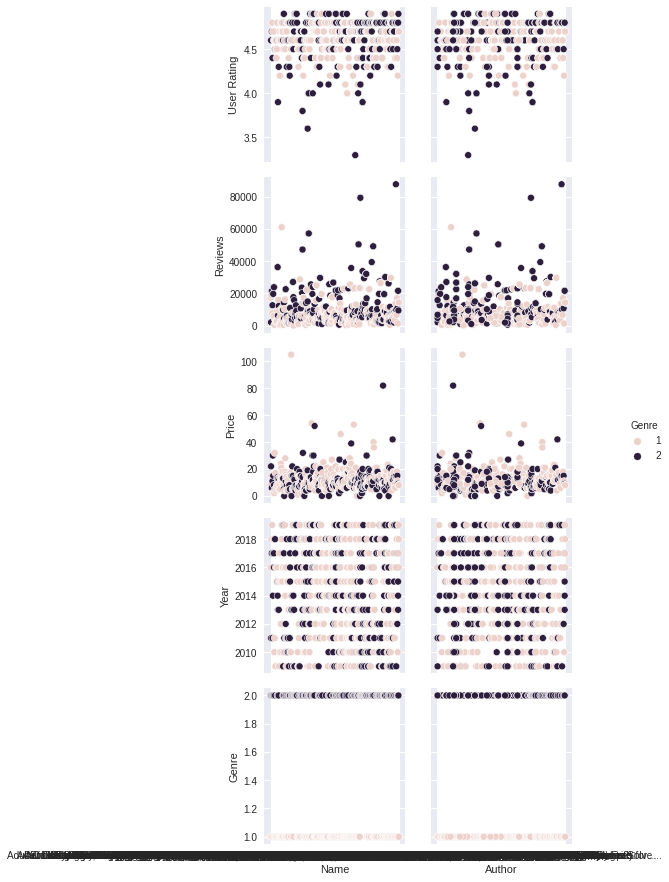

In [76]:
sns.pairplot(my_data,
             x_vars = ['Name', 'Author',],
             y_vars = ['User Rating', 'Reviews', 'Price', 'Year', 'Genre'],
             diag_kind='kde', hue='Genre'
             )

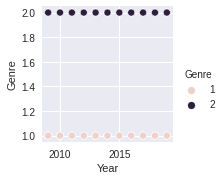

In [78]:
sns.pairplot(my_data,
             x_vars = ['Year'],
             y_vars = ['Genre'],
             diag_kind='kde', hue='Genre'
             )

Stripplots

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 769 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 133 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 769 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 133 missing from current font.
  font.set_text(s, 0, flags=flags)


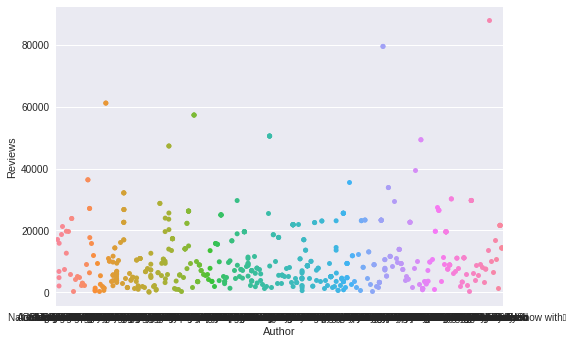

In [83]:
sns.stripplot(y='Reviews', x='Author', data= my_data)

Plotting multiple graphs together